In [43]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# load dark frames: dark-temp; each has 255 640x512 images
dark40 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_2.496212_400.fits")
dark35 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-35.0C_2.496212_400.fits")
dark30 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-30.0C_2.4967610000000002_400.fits")
dark25 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-25.0C_2.4967610000000002_400.fits")
dark20 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-20.0C_2.4967610000000002_400.fits")
dark15 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-15.0C_2.4967610000000002_400.fits")
dark10 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-10.0C_2.4967610000000002_400.fits")
dark5 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-5.0C_2.4967610000000002_400.fits")
dark0 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/0.0C_2.4967610000000002_400.fits")
darks = [dark40, dark35, dark30, dark25, dark20, dark15, dark10, dark5, dark0]

In [45]:
# load and subtract master bias frame from dark frames
# bias = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Bias/_____.fits")
# darks_subtracted = [dark - bias for dark in darks]

In [46]:
dark40_avg = np.mean(dark40, axis=0)
pixel_avg_40 = np.mean(dark40_avg)
dark_current_40 = pixel_avg_40 / (2.5*10**-3)
print(dark_current_40)

499373.88211837487


In [47]:
# average dark frames over 255 reads:
dark_avgs = [np.mean(dark, axis=0) for dark in darks]

# calculate mean pixel values at each temperature
pixel_avgs = [np.mean(dark_avg) for dark_avg in dark_avgs]

# calculate dark current = mean pixel value / exposure time
exposure_time = 2.5*10**(-3) # all dark frames have the same exposure time (ms)
dark_current = [pixel_avg / exposure_time for pixel_avg in pixel_avgs] # list of dark currents in e-/s, sorted by temperature ascending
print(dark_current)


[499373.88211837487, 513517.62508138025, 520370.25644339767, 545084.3077320773, 574375.4258195467, 614521.958524816, 670889.1503762635, 748469.9762944238, 877526.3366651346]


dark current increases at a rate of 8626.47436828212 e-/s per degree Celsius


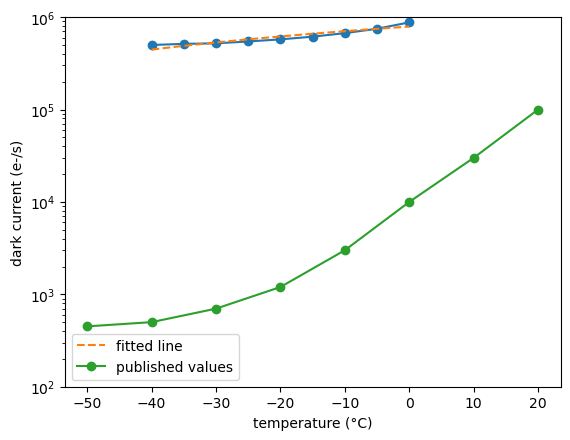

In [48]:
# plot temperature vs dark current
temp = [-40, -35, -30, -25, -20, -15, -10, -5, 0]
plt.plot(temp, dark_current, '-o')

# plot fitted line
coefs = np.polyfit(temp, dark_current, 1)
slope, intercept = coefs
dark_current_fit = [slope*t + intercept for t in temp]
plt.plot(temp, dark_current_fit, '--', label='fitted line')

# plot published dark current values
# these are for cred2 not cred2 er 
temp_pub = [-50, -40, -30, -20, -10, 0, 10, 20]
dark_current_pub = [450, 500, 700, 1200, 3000, 10000, 30000, 100000]
plt.plot(temp_pub, dark_current_pub, '-o', label='published values')

# other plot stuff
plt.ylabel('dark current (e-/s)')
plt.xlabel('temperature (°C)')
plt.yscale('log')
plt.ylim(10**2, 10**6)
plt.legend()

print('dark current increases at a rate of', slope, 'e-/s per degree Celsius')

In [49]:
# b/c previous measured dark current is so high, measure dark current again but w/ changing exposure time: dark current is supposed to increase with time
# -40C, 400 fps, tint=0, 2.5, 5, 10, 25, 50, 100, 200 ms
darkt0 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_0.0028_5.fits")
darkt2_5 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_2.502526_5.fits")
darkt5 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_5.002251_5.fits")
darkt10 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_10.001702_5.fits")
darkt25 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_25.000055_5.fits")
darkt50 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_50.000493999999996_5.fits")
darkt100 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_100.001373_5.fits")
darkt200 = fits.getdata(r"D:/HWP_Characterization/Data/Raw/CRED2_Characterization/Dark_Current/-40.0C_199.996761_5.fits")
darkts = [darkt0, darkt2_5, darkt5, darkt10, darkt25, darkt50, darkt100, darkt200]

In [50]:
# average dark frames over 10 reads:
darkt_avgs = [np.mean(darkt, axis=0) for darkt in darkts]

# calculate mean pixel values at each tint
pixel_avgs_t = [np.mean(darkt_avg) for darkt_avg in darkt_avgs]
print(pixel_avgs_t)
# calculate dark current = mean pixel value / exposure time
exposure_times = [0.0028/1000, 2.5/1000, 5/1000, 10/1000, 25/1000, 50/1000, 100/1000, 200/1000] # in s
dark_current_t = [pixel_avg_t / exposure_time for pixel_avg_t, exposure_time in zip(pixel_avgs_t, exposure_times)] # list of dark currents in e-/s, sorted by tint ascending
print(dark_current_t)


[1054.9947723388673, 859.1651654052732, 1094.6308447265626, 1023.4868557739259, 1265.5675091552735, 1479.204848327637, 1908.1421325683593, 2860.857077331543]
[376783847.2638812, 343666.06616210926, 218926.16894531253, 102348.68557739258, 50622.700366210935, 29584.096966552737, 19081.421325683594, 14304.285386657715]


dark current increases at a rate of -544509276.4183284 e-/s per 1 s


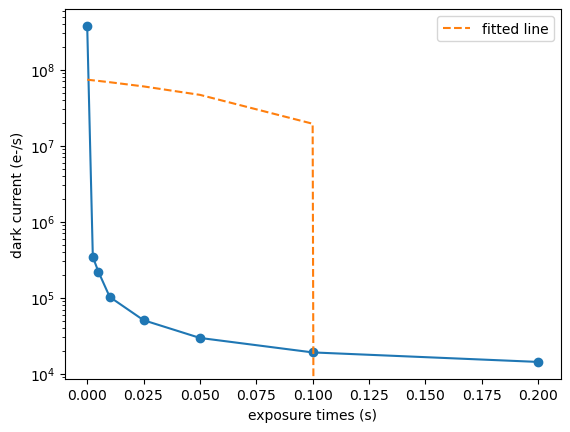

In [51]:
# plot tint vs dark current
plt.plot(exposure_times, dark_current_t, '-o')

# plot fitted line
coefs = np.polyfit(exposure_times, dark_current_t, 1)
slope, intercept = coefs
dark_current_fit = [slope*time + intercept for time in exposure_times]
plt.plot(exposure_times, dark_current_fit, '--', label='fitted line')

# other plot stuff
plt.ylabel('dark current (e-/s)')
plt.xlabel('exposure times (s)')
plt.yscale('log')
plt.legend()

print('dark current increases at a rate of', slope, 'e-/s per 1 s')